In [1]:
import numpy as np
import sklearn as sk
from sklearn.metrics.pairwise import cosine_similarity as cos_sim_sk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import torch
from torch.nn.functional import cosine_similarity as cossim_pt
from typing import Sequence, Dict, Tuple, List, Optional, Union

In [10]:
from huggingface_hub import notebook_login

notebook_login()

In [11]:
# Import GPT-2 Model and Tokenizer
from transformers import GPT2Model, GPT2Tokenizer
gpt2 = GPT2Model.from_pretrained('gpt2')
tokenizer_gpt2 = GPT2Tokenizer.from_pretrained('gpt2')
embeddings_gpt2 = gpt2.wte.weight.detach().numpy()

In [17]:
print(f'Embedding dimensiona: {gpt2.config.n_embd}')
print(f'Number of tokens: {gpt2.config.vocab_size:,}')
print(f'Size of embedding matrix: {embeddings_gpt2.shape}')
#

Embedding dimensiona: 768
Number of tokens: 50,257
Size of embedding matrix: (50257, 768)


# Create an unembeddings matrix and a random unembedding matrix of same shape

In [21]:
# Create an unembeddings matrix by transposing the GPT-2 embeddings matrix
unembeddings_gpt2 = embeddings_gpt2.T

# Create a random unembeddings matritx of same shape
unembeddings_random = np.random.randn(gpt2.config.n_embd, gpt2.config.vocab_size)
#

In [23]:
print(f'Shape of real unembeddings matrix: {unembeddings_gpt2.shape}')
print(f'Shape of random unembeddings matrix: {unembeddings_random.shape}')
print(f'Shape of GPT-2 embeddings matrix: {embeddings_gpt2.shape}')
#

Shape of real unembeddings matrix: (768, 50257)
Shape of random unembeddings matrix: (768, 50257)
Shape of GPT-2 embeddings matrix: (50257, 768)


# Explore unembeddings for a seedword

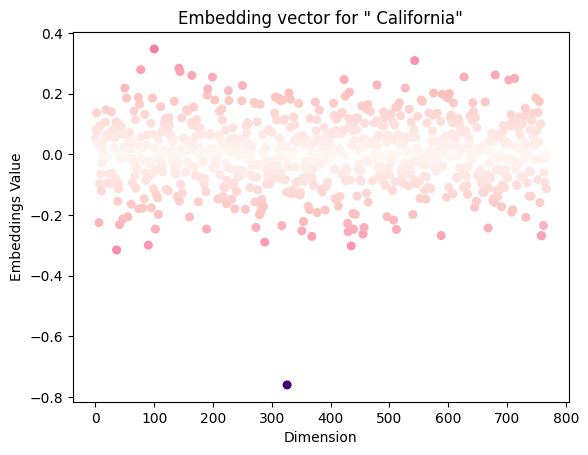

In [33]:
seedword = " California"

# Encode for token id
seed_idx = tokenizer_gpt2.encode(seedword)

# Get the embeddings vector
embed_vector = embeddings_gpt2[seed_idx,:]

# Plot the embeddings vector

plt.scatter(x=np.arange(len(embed_vector.flatten())), y=embed_vector.flatten(), s=30, c=abs(embed_vector.flatten()), cmap='RdPu')
plt.title(f'Embedding vector for "{seedword}"')
plt.xlabel('Dimension')
plt.ylabel('Embeddings Value')

plt.show()

In [36]:
# Project the embedding vector onto the random unembedding matrix
dPRand = embed_vector @ unembeddings_random
nextTokenRand_idx = np.argmax(dPRand)
nextTokenRand = tokenizer_gpt2.decode(nextTokenRand_idx)

print(' embeddings vendor x random unembeddings vector')
print(f' {embed_vector.shape}  {unembeddings_random.shape}. {dPRand.shape}')
print(f'  Random Token: {nextTokenRand}')
#

 embeddings vendor x random unembeddings vector
 (1, 768)  (768, 50257). (1, 50257)
  Random Token: ALL


In [53]:
# Project the embedding vector onto the real unembedding matrix
dPReal = embed_vector @ unembeddings_gpt2
nextTokenReal_idx = np.argmax(dPReal)
nextTokenReal = tokenizer_gpt2.decode(nextTokenReal_idx)

print(' embeddings vendor x real unembeddings vector')
print(f' {embed_vector.shape}  {unembeddings_random.shape}. {dPReal.shape}')
print(f'  Random Token: "{nextTokenReal}"')

 embeddings vendor x real unembeddings vector
 (1, 768)  (768, 50257). (1, 50257)
  Random Token: "California"


In [54]:
# Find the top 10 unembeddings
top10 = np.argsort(dPReal[0])[::-1][:10]

for i in top10:
  print(f'Dot Product {dPReal[0,i]:6.3f} for token "{tokenizer_gpt2.decode(i)}"')
#

Dot Product 10.136 for token "California"
Dot Product  9.617 for token " California"
Dot Product  8.816 for token " Californ"
Dot Product  8.088 for token "Calif"
Dot Product  7.718 for token " Calif"
Dot Product  7.359 for token " Nevada"
Dot Product  7.158 for token "Arizona"
Dot Product  7.151 for token "Colorado"
Dot Product  6.974 for token "Florida"
Dot Product  6.912 for token "Oregon"


# Generate a token sequence to an initial seed word

In [56]:
# Set a sequence length (i.e. number of tokens to generate)
seq_length = 10

# initial seed word
seedword = 'budget'

# initialize the list with the seed word
text = seedword

# loop to create the sequence
for i in range(seq_length-1):

  # tokenize the word
  token = tokenizer_gpt2.encode(text)

  # get embedding vector
  embed_vector = embeddings_gpt2[token,:]

  # project the embedding vector onto unembedding matrix
  dp = embed_vector @ unembeddings_gpt2

  # find Top projections based on the dot-product values
  top10 = np.argsort(dp[0])[::-1][:seq_length]

  # randomly pick one token
  random_token = np.random.choice(top10)
  seedword = tokenizer_gpt2.decode(random_token)

  # add the seedword to the text
  text += seedword

print(text)

budgetsoDeliveryDate budgetarybudget budgetaryusteritybudgetusterityusterity contrace


In [57]:
# Set a sequence length (i.e. number of tokens to generate)
seq_length = 10

# initial seed word
seedword = 'budget'

# initialize the list with the seed word
text = seedword

# loop to create the sequence
for i in range(seq_length-1):

  # tokenize the word
  token = tokenizer_gpt2.encode(text)

  # get embedding vector
  embed_vector = embeddings_gpt2[token,:]

  # project the embedding vector onto unembedding matrix
  dp = embed_vector @ unembeddings_random

  # find Top projections based on the dot-product values
  top10 = np.argsort(dp[0])[::-1][:seq_length]

  # randomly pick one token
  random_token = np.random.choice(top10)
  seedword = tokenizer_gpt2.decode(random_token)

  # add the seedword to the text
  text += seedword

print(text)

budgeteleCovereleCover luckily Nicolanceele Nicola
